## The goal is to take our .fif file and read it as an array and save it as a numpy

In [1]:
import numpy as np
import mne
%matplotlib inline
import matplotlib.pyplot as plt
import scipy 
from scipy.stats import hmean,trim_mean
import pandas as pd

In [33]:
raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif")
print(raw.info)
print(raw.ch_names)

Opening raw data file C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif...
This filename (C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61)  idle
    Range : 0 ... 1807649 =      0.000 ...  1807.649 secs
Ready.
add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
<Info | 19 non-empty fields
    bads : 'list | 0 items
    buffer_size_sec : 'numpy.float64 | 1.0
    ch_names : 'list | Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, CP5
    chs : 'list | 63 items (EOG: 2, EEG: 61)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    dev

<ipython-input-33-4f9546b8506b>:1: RuntimeWarning: This filename (C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif")
<ipython-input-33-4f9546b8506b>:1: DeprecationWarning: add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
  raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif")


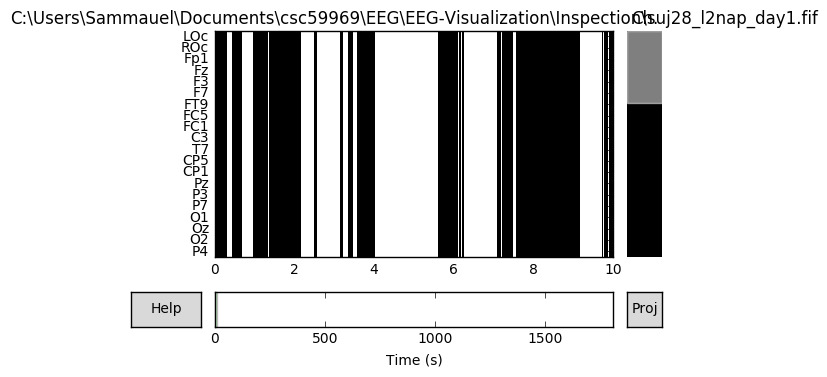

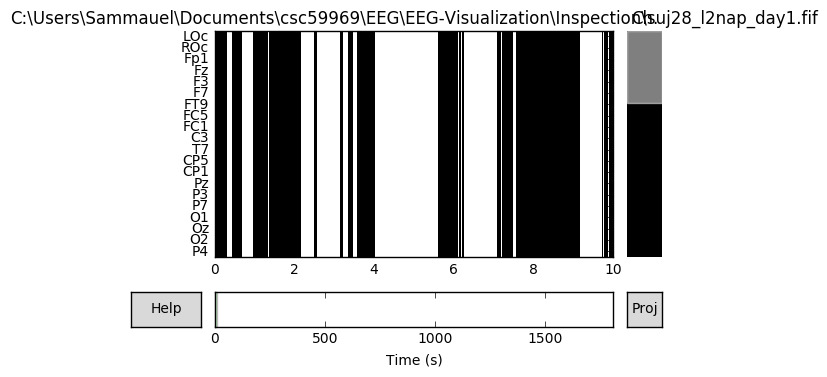

In [34]:
scalingDict=dict(mag=1e-12,grad=4e-11,eeg=20e-6,eog=150e-6,ecg=5e-4,
                 emg=1e-3,ref_meg=1e-12,misc=1e-3,stim=1,
                 resp=1,chpi=1e-4)

raw.plot(start=0.,# initial time to show
         duration=10.0,# time window (sec) to plot in a given time
         n_channels=20,# number of channels to plot at once
         scalings=scalingDict,)# scaling factor for traces. MNE-python documentation

In [69]:
df = raw.to_data_frame(picks=None, index=None, scale_time=1000.0, scalings=dict(eeg=1e1), copy=True, start=None, stop=None)
df.head()

Converting time column to int64...


signal,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,CP5,...,CP4,TP8,C6,C2,FC4,FT8,F6,F2,LOc,ROc
time,,,,,,,,,,,,,,,,,,,,,
0,116106.630859,148555.996094,157132.763672,15210.850830,65826.606445,-8905.605469,180690.898438,164804.902344,132379.628906,149060.224609,...,169798.457031,39931.582031,216839.199219,63821.650391,178667.207031,16611.446533,-19175.622559,167308.300781,2.394019e+10,7.116602e+09
1,116093.828125,148615.820312,157122.509766,15191.236572,65843.940430,-8927.708130,180703.378906,164844.746094,132392.558594,149029.687500,...,169803.945312,39905.212402,216850.136719,63814.785156,178690.781250,16599.552002,-19169.559326,167238.964844,2.392720e+10,7.111475e+09
2,116080.185547,148676.503906,157111.806641,15171.198730,65863.188477,-8951.473389,180716.054688,164885.351562,132405.839844,148996.923828,...,169809.453125,39876.218262,216861.542969,63807.265625,178715.605469,16586.447754,-19163.660889,167165.078125,2.391221e+10,7.102100e+09
3,116065.058594,148738.310547,157100.371094,15150.505371,65885.883789,-8978.146362,180729.003906,164927.187500,132419.677734,148960.351562,...,169815.039062,39842.580566,216873.691406,63798.608398,178742.636719,16571.191406,-19158.126221,167083.164062,2.390801e+10,7.100537e+09
4,116048.173828,148800.419922,157088.232422,15129.283447,65912.871094,-9008.199463,180742.148438,164969.921875,132434.013672,148919.492188,...,169820.664062,39803.398438,216886.718750,63788.627930,178772.148438,16553.343506,-19153.209229,166991.816406,2.391846e+10,7.100244e+09


In [72]:
## To save this as csv run the following
#df.to_csv("suj28_l2nap_day1.csv")
#df1 = pd.read_csv("suj28_l2nap_day1.csv")
#df1.head()

In [35]:
raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif")
raw.load_data
raw.resample

Opening raw data file C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif...
This filename (C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61)  idle
    Range : 0 ... 1807649 =      0.000 ...  1807.649 secs
Ready.
add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.


<ipython-input-35-d0d63054cf97>:1: RuntimeWarning: This filename (C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif")
<ipython-input-35-d0d63054cf97>:1: DeprecationWarning: add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
  raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif")


<bound method resample of <Raw  |  suj28_l2nap_day1.fif, n_channels x n_times : 63 x 1807650 (1807.6 sec), ~114 kB, data not loaded>>

In [89]:
data,time = raw[:,:]
print(data.shape)

(63, 1807650)


In [108]:
# Wanted to know if numpy was responsive at all.
#np.savetxt('test.txt', data)

In [112]:
#np.save('test.npy', data)

In [111]:
testing = np.load('test.npy')
testing[:,:]

array([[ 11610.66308594,  11609.3828125 ,  11608.01855469, ...,
         11579.25585938,  11579.37597656,  11579.50292969],
       [ 14855.59960938,  14861.58203125,  14867.65039062, ...,
         15304.23144531,  15305.53027344,  15306.84570312],
       [ 15713.27636719,  15712.25097656,  15711.18066406, ...,
         15786.72558594,  15786.75292969,  15786.77832031],
       ..., 
       [ 16730.83007812,  16723.89648438,  16716.5078125 , ...,
         16120.19921875,  16119.87988281,  16119.61328125],
       [ 23940.18554688,  23927.19726562,  23912.20703125, ...,
         22154.19921875,  22153.07617188,  22154.05273438],
       [  7116.6015625 ,   7111.47460938,   7102.09960938, ...,
         15061.76757812,  15061.47460938,  15061.76757812]])

In [39]:
start, stop = raw.time_as_index([0,1800000]) # 0 to 30 min
data,times = raw[:63, start:stop]
print(data.shape)
print(times.shape)
print(times.min(), times.max())

(63, 1807650)
(1807650,)
0.0 1807.649


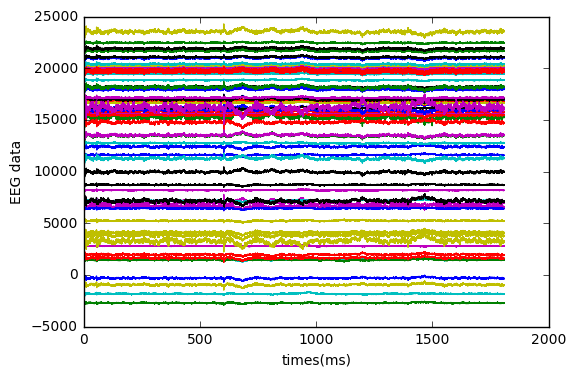

In [42]:
picks = mne.pick_types(raw.info, eeg=True)
data,times = raw[picks[:61], start:stop]

plt.plot(times, data.T)
plt.xlabel('times(ms)')
plt.ylabel('EEG data')
plt.show()

#### Convert the infomation into binaray file or json